<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF OPE - 2019</span></p>
<p><font size="4">  UE Machine Learning and advanced processing methods for multi-sensor data  </font></p>
<p></p>
<p><font size="5">  Notebook 01: Python lab - Approach SVM </font></p>
</p></br>
</p>
</CENTER>

$$ 
\def\R{{\mathbb R}} 
\def\N{{\mathbb N}} 
\def\Z{{\mathbb Z}} 
\def\Xm{{\bf X}}
\def\xv{{\bf x}}
\def\Ym{{\bf Y}}
\def\yv{{\bf y}}
\def\wv{{\bf w}}
\def\lambdav{{\bf \lambda}}
$$

Given a training dataset of $M$ points of the form $(\xv_1,y_1), \ldots, (\xv_M,y_M)$ where $y_m \in \{-1,1\}$, each indicating the class to which the point $\xv_m$ belongs. Each $\xv_m \in \R^N$.

Pourpose: Determine the maximum-margin hyperplane (support vector) that divides the group of points $\xv_m$ for which $y_m = 1$ from the group of points for which $y_m=-1$.

# <span style="color:#00B8DE"> 1. Linear separable data</span>

There exist a vector $\wv = (w_1, \ldots, w_N)\in \R^N$ and $b \in \R$ such that $y_m(\wv^\top \xv_m +b)\leq 0$ for every $m \in [1,M]$. To define the vector $\wv$ and the parameter $b$, we resolve the dual optimisation problem follows:

$\text{maximize}_{\lambda \in \R^M} L(\lambda) = -\frac{1}{2} \sum\limits_{m' =1}^M \sum\limits_{m =1}^M \lambda_{m'}\lambda_{n} y_{m'} y_{m}\xv_{m'}^\top\xv_{m}  + \sum_{m=1}^M \lambda_m $

such that: $\lambdav^\top \yv = 0$ and $\lambda_m\geq 0$ for every $m \in [1,M]$

Then : $\wv^* = \sum_{m = 1}^M \lambda_m y_m \xv_m$ and $b^* = \frac{1}{\#\mathcal{K}} \sum_{k \in \mathcal{K}}\left(y_k -  \sum_{m = 1}^M \lambda_m y_m \xv_m \xv_k\right)$ where $\mathcal{K} = \{k: \lambda_k >0\}$.


In [6]:
import numpy as np
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles

from matplotlib import pyplot as plt


#### Question 1: Coding the Soft Margin Support Vector Machines (SVM) method by using cvxopt libraty to solve the quadratic optimization problem (https://cvxopt.org/userguide/coneprog.html#quadratic-programming)


In [7]:
"""
Programe algorithm SVM where
input: X in R^{M x N} training dataset
       y in R^N labels
output: w in R^M 
        b in R
"""

def SVM(X, y):
    
    N, M = X.shape 
 
    K = np.dot(X, X.T)
    P = cvxopt.matrix(np.outer(y, y) * K)
    
    
    q = cvxopt.matrix(-np.ones(N) )
    A = cvxopt.matrix(y, (1, N))
    
    b = cvxopt.matrix(0.0) 
    G = cvxopt.matrix(np.diag(-np.ones(N)))
    h = cvxopt.matrix(np.zeros(N)) 
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
    lambd = np.ravel(solution['x']) # Lagrange multipliers
    sv = lambd > 1e-5 # Lagrange have non zero lagrange multipliers
    
    lambd = lambd[sv]
    X_sv = X[sv]
    y_sv = y[sv]# Intercept
    
    k = K[sv, :]
    k = k[:,sv]
    
    b = np.sum(y_sv - sum(np.tile(lambd*y_sv,(len(lambd),1)).T*k) )/ len(lambd)    
    
    t = np.tile(lambd*y_sv,(1,X_sv.shape[1]))
    
    w = sum(np.tile(lambd*y_sv,(X_sv.shape[1],1)).T*X_sv)
    
    return w, b, lambd, X_sv, y_sv

#### Question 2. Define the predict function as well as the decision boundary line


In [8]:
"""
define the functions to decide 
"""

def predict(X, w, b):
    return np.sign(np.dot(X, w) + b)    
    
def f_sv(x, w, b):
    
    return (-w[0] * x - b) / w[1]


#### Question 3.  Test the SVM code for a linear serapable data which is generate by using the scikit-learn library (https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/)

In [9]:
"""
Use the scikit-learn library to generate linearly separable data 
(https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/)
"""

N = 250
M = 2

X, y = make_blobs(n_samples = N, centers=M, random_state=0, cluster_std=0.60)

#  label the negative samples as -1 instead of 0
y[y==0] = -1
tmp = np.ones(len(X))
y = tmp * y

# split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create and train an instance of our support vector machine class.

w, b, lambd, X_sv, y_sv = SVM(X_train, y_train)
print(lambd)


[0.53109618 4.00938943 3.47829323]


#### Question 4. Visualize the result i.e. plot the test data and the decision boundary line


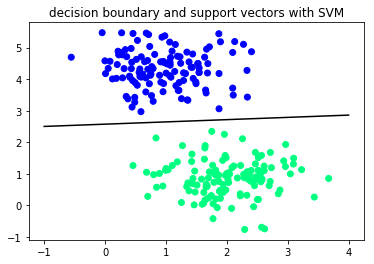

In [10]:
# Figure

# w.x + b = 0
x0 = -1
f0 = f_sv(x0, w, b)

x1 = 4
f1 = f_sv(x1,w,b)

plt.figure(1)
plt.title('decision boundary and support vectors with SVM')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

plt.plot([x0,x1], [f0,f1], 'k')# w.x + b = 1

In [11]:
X_train_ = np.repeat(X_train, 40, axis=0)
y_train_ = np.repeat(y_train,40,axis=0)

from sklearn import svm

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_train_, y_train_)



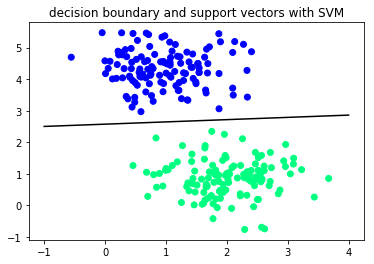

In [24]:
# Figure

# w.x + b = 0
x0 = -1
f0 = f_sv(x0, w, b)

x1 = 4
f1 = f_sv(x1,w,b)

plt.figure(1)
plt.title('decision boundary and support vectors with SVM')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

plt.plot([x0,x1], [f0,f1], 'k')# w.x + b = 1

# <span style="color:#00B8DE"> 2. Non-Linear separable data</span>


In this part, you consider a non-linear separable data which is generated as follows

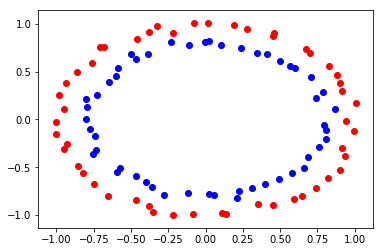

In [12]:
#Create a non-linear separable data

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.03)

y[y==0] = -1
tmp = np.ones(len(X))
y = tmp * y

x1_ = X[y==1,:] 
x2_ = X[y==-1,:]

plt.scatter(x1_[:,0],x1_[:,1],color='blue')
plt.scatter(x2_[:,0],x2_[:,1],color='red')


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


#### Question 5.  Define the following kernels 

1. Linear: $K(x,x') = <x,x'>$
2. Polynomial:  $K(x,x') = (\gamma <x,x'> + \beta )^p$
3. Gaussian: $K(x,x') = \exp (-\|x-x'\|^2/2\sigma) $
4. Sigmoid: $K(x,x') = \tanh (\gamma <x,x'> + \beta)$

In [16]:
# Kernel  

def kernels_func(x,y,ker='linear',p1=1,p2=0):
    if ker == 'linear':
        return (np.dot(x,y.T))
    elif ker == 'poly':
        return (np.dot(x,y.T) + p2)**p1
    elif ker == 'gauss':       
        return np.exp(-np.sum((np.tile(x,(y.shape[0],1)) - np.repeat(y,x.shape[0],axis = 0))**2, axis=1)/(2*p1))        
        #return np.exp(-(sum(x-y)**2)/(2*p1)) 
    else:
        return np.tanh(p1*np.dot(x,y.T) + p2)
        

#### Question 6. Coding the Kernel-based Support Vector Machines method (SVM_kernel) for the non linear separable data case

In [17]:
"""
Programe algorithm SVM_kernel where
input: X in R^{M x N} training dataset
       y in R^N labels
       param: parameters of the kernels
       ker: type of kernel
       
output: lambd in \R^M the dual optimal 
        b in R
        (X_sv, y_sv) set of data and its labels which correspond to the lambd >0 
"""

def SVM_kernel(X, y,ker='linear',p1=1,p2=0):
    N, M = X.shape# P = X^T X
    
    K = kernels_func(X,X,ker='linear',p1=1,p2=0)# K[i,j] = <X[i], X[j]>
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(-np.ones(N))# q = -1 (1xN)
    A = cvxopt.matrix(y, (1, N))# A = y^T 
    b = cvxopt.matrix(0.0)# b = 0  
    G = cvxopt.matrix(np.diag(-np.ones(N))) # -1 (NxN)
    h = cvxopt.matrix(np.zeros(N)) # 0 (1xN)
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    lambd = np.ravel(solution['x']) # Lagrange multipliers

    sv = lambd > 1e-5 # Lagrange have non zero lagrange multipliers
    
    lambd = lambd[sv]
    X_sv = X[sv]
    y_sv = y[sv]# Intercept
    
    k = K[sv, :]
    k = k[:,sv]
    
    b = np.sum(y_sv - sum(np.tile(lambd*y_sv,(len(lambd),1)).T*k) )/ len(lambd)  
         
    return  b, lambd, X_sv, y_sv

#### Question 7. Define the predict function 

In [18]:
#Decision 

def predict_kernel(lambd, X_sv, y_sv, b, X_test,ker='linear',p1=1,p2=0):
    return np.sign(np.sum(np.tile(lambd*y_sv,(X_test.shape[0],1))* kernels_func(X_test,X_sv,ker='linear',p1=1,p2=0),axis=1) +b)

    """
    ntest = X_test.shape[0]
    decid = np.zeros(ntest)
    
    for i in range(ntest):
        for j in range(len(lambd)):
            decid[i] += lambd[j]*y_sv[j]*kernels_func(X_sv[j,:], X_test[i,:],ker='linear',p1=1,p2=0)
            
    return np.sign(decid+b)
    """

#### Question 7 (bonus). Test SVM_kernel algorithm for the non linear data below and compare the results obtained by using different kenels

In [19]:
# split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create and train an instance of our support vector machine class.

b, lambd, X_sv, y_sv = SVM_kernel(X, y, ker='gauss')#SVM_kernel(X_train, y_train)

y_test_ = predict_kernel(lambd, X_sv, y_sv, b, X_test, ker='gauss')


# <span style="color:#00B8DE">3. Real data</span>


The objective of this section is to segment a brain MRI examination obtained from three different acquisition sequences: T1, T2 and Flair. Three classes will be considered: white matter, gray matter and cerebrospinal fluid.

#### Question 8. use the skimage.io function to read the T1, T2, Flair (float64) images as well as the mask delimiting the region of interest (np.uint8). Use the loadtxt in numpy to read the IRM_labels .

In [3]:
from skimage import io
import numpy as np

image_T1    = io.imread('./data/IRM/T1.png').astype(np.uint8)[:,:,0]# io.imread(...) # to fill
image_T2    = io.imread('./data/IRM/T2.png').astype(np.uint8)[:,:,0]# to fill
image_Flair = io.imread('./data/IRM/flair.png').astype(np.uint8)[:,:,0]# to fill
image_Mask  = io.imread('./data/IRM/mask.png').astype(np.uint8)[:,:,0] #.astype(np.unit8) to fill
image_Mask = image_Mask/np.max(image_Mask)
#image_Label  = np.loadtxt('./em/IRM_labels.txt', delimiter=',') # to fill


#### Question 9. For each image (T1, T2, Flair), set the intensities outside the mask to zero


In [4]:
image_T1 = image_T1 * image_Mask 
image_T2 = image_T2 * image_Mask 
image_Flair = image_Flair * image_Mask 

#### Question 10. Visulize image_T1, image_T2 and image_Flair (use subplot) 

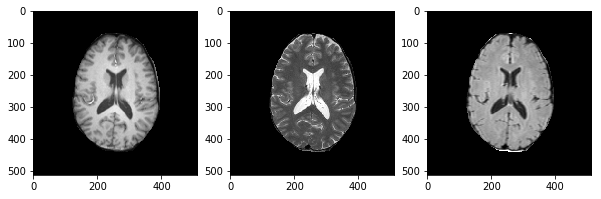

In [5]:
plt.figure('MRI',figsize=(10,20))
plt.subplot(131)
plt.imshow(image_T1, cmap='gray')
plt.subplot(132)
plt.imshow(image_T2, cmap='gray')
plt.subplot(133)
plt.imshow(image_Flair, cmap='gray')

#### Question 11. Create the training set from the data by cropping a set value into [300:350,200:250]. Use the image_T1 to generate a simpleLabel by setting the values <120 to 1 and -1 otherwise.

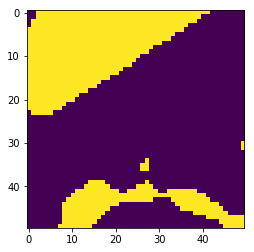

In [6]:
simpleT1 = image_T1[300:350,200:250]
simpleT2 = image_T2[300:350,200:250]
simpleFlair = image_Flair[300:350,200:250]

simpleLabel = simpleT1.copy() 
simpleLabel[simpleLabel<120] = 1
simpleLabel[simpleLabel>=120] = -1

plt.imshow(simpleLabel)
 

#### Question 12. We now wish to keep only the data inside the mask, in the form of 1D vectors (one vector per image). Perform this operation using the numpy.reshape function (...., - 1)

In [89]:
# we only keep the mask data

vec_simpleT1 = np.reshape(simpleT1,-1)
vec_simpleT2 = np.reshape(simpleT2,-1)
vec_simpleFlair  = np.reshape(simpleFlair,-1)
vec_simpleLabel = np.reshape(simpleLabel,-1)

# we put this data in a single variable
samples = np.column_stack((vec_simpleT1,vec_simpleFlair))

data_test = np.column_stack((image_T1.flatten(),image_Flair.flatten()))



#### Question 13: Test these simples and show the segmented result

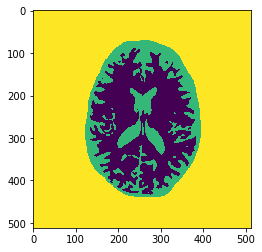

In [90]:
b, lambd, X_sv, y_sv = SVM_kernel(samples, vec_simpleLabel)
segsvm = predict_kernel(lambd, X_sv, y_sv, b, data_test)

segsvm2D = np.reshape(segsvm, image_T1.shape)
seg = image_Mask.copy()
seg[seg==0] = 2
seg[seg==1] = segsvm2D[seg==1]

plt.figure('segmentation with svm')
plt.imshow(seg)